## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

### Answer:

1. Does an association exist between personality and left-handedness?

2. Do people who like dancing tend to be left-handed?

3. On average, are people who did not work very hard in school left-handed?


---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
#Importing all libraries that may be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#reading in the data. using 'sep' to organize the data as it reads in.
data = pd.read_csv('data.csv', sep = '\t')

In [2]:
# Calling .head() to make sure the data reads in correctly
data.head() 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

### Answer:

1. What is the worst case scenerio if this data fell into the wrong hands?
    (I'll provide another example since this is kind of in the mark down box above)

2. Maintain informed consent

3. Keeping confidentiality or anonymity 

4. Is my data going to be explainable and is it going to be interpretable

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [3]:
#Checking the shape of the data
data.shape

(4184, 56)

In [4]:
# Checking dtypes
data.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [5]:
# Calling .describe() to get an overview of some toh the data
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [6]:
# Checking to see if there are any missing values
    # after checking for missing values, added .sum() to the end to shorten the output
data.isnull().sum().sum()

0

In [7]:
# Since our options for hand is right (1), left (2), or both (3), calling value counts to see the totals
data['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

# Right Handed - 3,532 
# Left Handed - 452
# Both - 179
# Did not Respond - 11

In [8]:
# Calling .describe() to get an overview of the data in the hand column
data[['hand']].describe()

,hand
count,4184.000000
mean,1.190966
std,0.495357
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [9]:
# Creating a correlation variable for the hand column in relation to the rest of the df

corr = data[data['hand'] == 2].corr().sort_values('hand', ascending=False)


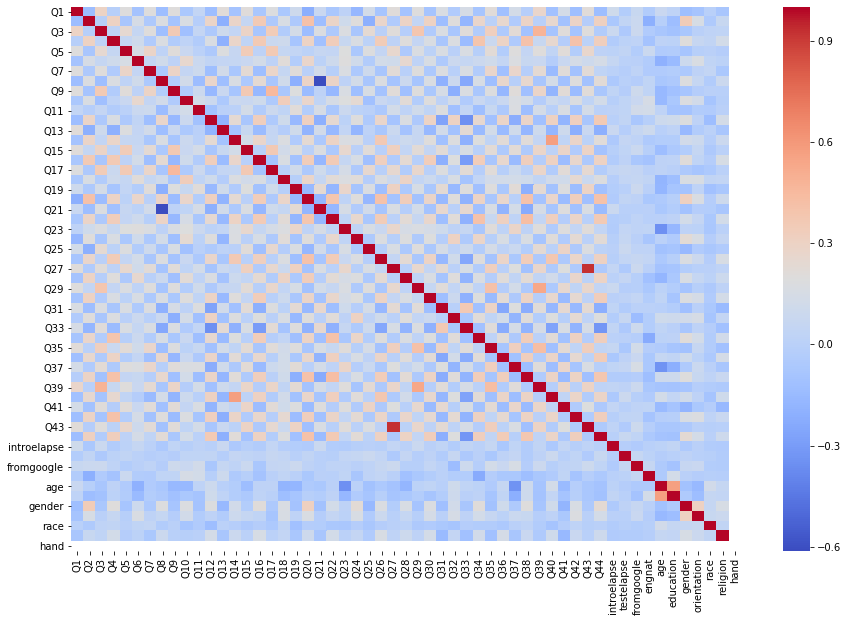

In [10]:
# Creating heatmap of corr
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
#             annot = True, 
            cmap = 'coolwarm');

In [11]:
#Noticed that q 27 and 43 were duplicates, so I'm looking to see if they have the same responses

data[['hand', 'Q27', 'Q43']].head()

,hand,Q27,Q43
0,3,5,5
1,1,1,4
2,2,2,2
3,2,1,1
4,3,5,5


# Kevin Note: Since the answers are different, I'll have to keep both columns

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

### Answer: 

Because my y value in this instance is a discrete variable (Left-handed:Yes, or Left-handed:No), we would treat this as a classification problem.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

### Answer: 

We would standardize our variables so that we can compare features that have different units of measure or different scales. Then once the features are standardized, the training process will work better.

For example: If we look at our project 2 where we had 70+ home features to choose from, many of these features were on different scales and separated by a few orders of magnitude (ex. square footage is in the thousands and number of bedrooms is in the single digits). The idea is to rescale an original variable to have equal range and/or variance.

** Example adapted from 3.05 lesson **

### 7. Give an example of when we might not standardize our variables.

### Answer: 

We might not standardize our variables if we are using a linear regression, the data provided is proportionsal or if the scale between our features actually does matter and we don't want lose that information from our dataset.

(this may be a stetch...) 

An example would be the Fukushima nuclear power plant disaster of 2011. When we standardize our variables we remove or adjust outliers. They built the power plant to withstand the largest earthquake they had seen in 100 years, but the 2011 earhtquake was an outlier. When the scale matters, we should not be standardizing our variables. 

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

### Answer: 

Since we are going to be using KNN and it is calculating the distance between neighbors, that makes it very sensitive to the degree of our variables. So in order for it to work properly it would be important to standardize our variables

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

### Answer: 

In this instance our Y-variable is 'hand', or whether or not a person is right handed or left handed. That column currently has four potential responses: 

0 - no response

1 - Right handed

2 - Left handed 

3 - Both


We need to make this variable binary, so I would make only right handed or left handed as options. I would also included "both" as left handed, since they are able to use their left hand as a dominant hand. 

In [12]:
# Using get_dummies to make 'hands' binary
left_handed = pd.get_dummies(data['hand'])

#Renaming columns for my dummies
left_handed.columns = ['no_response', 'right_handed', 'left_handed', 'both']

#Combining left_handed and both to one column
left_handed['left_handed'] = left_handed['left_handed'] + left_handed['both']

#Dropping all columns other than left_handed now that we have it cleaned up
left_handed.drop(columns = ['no_response', 'right_handed', 'both'], inplace=True)

left_handed.head()

,left_handed
0,1
1,0
2,1
3,1
4,1


In [13]:
#Adding my new dummied left_handed column to my data set
data = pd.concat((data,left_handed), axis =1)

In [14]:
#Checking to see that concat worked 
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,left_handed
0,4,1,5,1,5,1,5,1,4,1,...,2,1,22,3,1,1,3,2,3,1
1,1,5,1,4,2,5,5,4,1,5,...,2,1,14,1,2,2,6,1,1,0
2,1,2,1,1,5,4,3,2,1,4,...,2,2,30,4,1,1,1,1,2,1
3,1,4,1,5,1,4,5,4,3,5,...,2,1,18,2,2,5,3,2,2,1
4,5,1,5,1,5,1,5,1,3,1,...,2,1,22,3,1,1,3,2,3,1


### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: 

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [15]:
#Using list comprehension to get all numeric columns and excluding the ones I dont need
features = [c for c in data._get_numeric_data().columns if not c in ['left_handed', 
                                                                      'introelapse',
                                                                      'testelapse',
                                                                      'fromgoogle', 
                                                                      'engnat',
                                                                      'age', 
                                                                      'education',
                                                                      'religion',
                                                                      'hand']]
#Setting my X and my Y
X = data[features]
y = data['left_handed']
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q38,Q39,Q40,Q41,Q42,Q43,Q44,gender,orientation,race
0,4,1,5,1,5,1,5,1,4,1,...,1,5,5,5,1,5,1,1,1,3
1,1,5,1,4,2,5,5,4,1,5,...,4,1,3,1,4,4,5,2,2,6
2,1,2,1,1,5,4,3,2,1,4,...,2,1,4,2,2,2,2,1,1,1
3,1,4,1,5,1,4,5,4,3,5,...,4,1,2,1,1,1,3,2,5,3
4,5,1,5,1,5,1,5,1,3,1,...,1,5,5,5,1,5,1,1,1,3


In [16]:
# Train/test splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Instantiating the standard scaler
ss = StandardScaler()

In [18]:
ss.fit(X_train);

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [19]:
#Scaling the test and train X
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Instantiating KNN for k= 3, k=5, k=15, and k=25

knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn25 = KNeighborsClassifier(n_neighbors=25)

In [21]:
#Fitting all 4 models
knn3.fit(X_train_sc, y_train)
knn5.fit(X_train_sc, y_train)
knn15.fit(X_train_sc, y_train)
knn25.fit(X_train_sc, y_train);

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

### Answer: 

Yes, regularization is applied by default. The default is set to L2, or ridge. 

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

### Answer:

Yes, and I already did whether I needed to or not

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [85]:
# Instantiating my four models

lasso_lr1 = LogisticRegression(penalty='l1', C=1.0)
lasso_lr10 = LogisticRegression(penalty='l1', C=10.0)
ridge_lr1 = LogisticRegression(penalty='l2', C=1.0)
ridge_lr10 = LogisticRegression(penalty='l2', C=10.0)

In [86]:
lasso_lr1.fit(X_train_sc, y_train)
lasso_lr10.fit(X_train_sc, y_train)
ridge_lr1.fit(X_train_sc, y_train)
ridge_lr10.fit(X_train_sc, y_train);

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

### Answer:

I think my X variables are very broad and didnt ultimately show a great correlation with which hand a person is dominant, so I dont think they would do a great job of predicting my Y. I also think a few of them would have some multicolinearity (Q43 and 27 are the same for example). I tihnk this would ultimately provide a lower accuracy score here.  

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [87]:
# Scoring my train knn where k = 3
knn3.score(X_train_sc, y_train)

0.8833652007648184

In [88]:
# Scoring my test knn where k = 3
knn3.score(X_test_sc, y_test)

0.7992351816443595

In [89]:
# Scoring my train knn where k = 5
knn5.score(X_train_sc, y_train)

0.8636073932441045

In [90]:
# Scoring my test knn where k = 5
knn5.score(X_test_sc, y_test)

0.8250478011472275

In [91]:
# Scoring my train knn where k = 15
knn15.score(X_train_sc, y_train)

0.8553218610579987

In [92]:
# Scoring my test knn where k = 15
knn15.score(X_test_sc, y_test)

0.8307839388145315

In [93]:
# Scoring my train knn where k = 25
knn25.score(X_train_sc, y_train)

0.8553218610579987

In [94]:
# Scoring my test knn where k = 25
knn25.score(X_test_sc, y_test)

0.8307839388145315

In [95]:
# Scoring my train lr where Alpha = 1 and Penalty = L1
lasso_lr1.score(X_train_sc, y_train)

0.8553218610579987

In [96]:
# Scoring my test lr where Alpha = 1 and Penalty = L1
lasso_lr1.score(X_test_sc, y_test)

0.8307839388145315

In [97]:
# Scoring my train lr where Alpha = 10 and Penalty = L1
lasso_lr10.score(X_train_sc, y_train)

0.8553218610579987

In [98]:
# Scoring my test lr where Alpha = 10 and Penalty = L1
lasso_lr10.score(X_test_sc, y_test)

0.8307839388145315

In [99]:
# Scoring my train lr where Alpha = 1 and Penalty = L2
ridge_lr1.score(X_train_sc, y_train)

0.8553218610579987

In [100]:
# Scoring my test lr where Alpha = 1 and Penalty = L2
ridge_lr1.score(X_test_sc, y_test)

0.8307839388145315

In [101]:
# Scoring my train lr where Alpha = 10 and Penalty = L2
ridge_lr10.score(X_train_sc, y_train)

0.8553218610579987

In [102]:
# Scoring my test lr where Alpha = 10 and Penalty = L2
ridge_lr10.score(X_test_sc, y_test)

0.8307839388145315

### Answer:

| Model | K or Alpha = | Score |
|-------|--------------|-------|
| knn   | 3            | 88    |
| knn   | 5            | 86    |
| knn   | 15           | 85    |
| knn   | 25           | 85    |
| lasso | 1            | 85    |
| lasso | 10           | 85    |
| ridge | 1            | 85    |
| ridge | 10           | 85    |

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

### Answer:

knn with k = 3 is showing evidence that it is overfit. Since the training score was so much higher than the test score, that would indicate that our model is overtrained and when presented with a new set of data is not able to perform nearly as well. 

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

### Answer:

Broadly speaking, as the value of k increases the variance would increase and the bias would decrease

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

### Answer:

1. We might try to increase our sample size to get a better representation of the data

2. We might try to use different X values to try and break up some of the "noise".

3. We might try to change our k value

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

### Answer:

Since all of the valuesa are the same and there is such a small difference between the two values, I would argue that there is not strong evidence of overfitting.


### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

### Answer:

Broadly speaking, as the $C$ increases I would think that variance would increase since we are offering more data to rain ouir model

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

### Answer:

Nothing happens as I increase or decrease $C$. In this specific instance that would tell me that the alpha does not have an effect on the model

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

### Answer:

1. Make sure we are identifying important variables and eliminating irrelevant ones

2. Choose a large enough sample size to handle all predictors, interactions, and polynomial terms the response variable might require. 

3. We could use regularizaiton to simplify our model

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

### Answer:

I would rasther use KNN, because it's simpler, more straight forward, and dhas fewer hyperparameters that need tuned :) None of that means that it will be more accurate, but that wasn't the question

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [103]:
print(lasso_lr1.coef_)

[[ 0.08913813  0.00816251  0.08796153  0.00338383  0.01161769 -0.02869962
  -0.00845834 -0.15643044  0.         -0.01986845  0.00258233 -0.00182865
  -0.00041803 -0.08145748 -0.03901974  0.0744121   0.04829245 -0.05722131
   0.0362676  -0.03171614 -0.10663483 -0.12507726 -0.0701529  -0.02568723
   0.05180747  0.13282846  0.19818744 -0.01169813  0.05669325 -0.05565507
  -0.03152771  0.          0.04813457  0.05162541  0.13072815 -0.06405539
  -0.02922004  0.09978335 -0.13167286 -0.02232124 -0.09316926  0.02039426
  -0.18045115  0.09387226 -0.03231404  0.20094014 -0.07231506]]


### Answer:

The coefficient (or parameter estimate) for the variable Q1 is 0.089.  This means that for a one-unit increase in Q1, we expect a 0.089 increase in the log-odds of the dependent variable left-handed.


### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

### Answer:

I would select the logistic regression. It provides more imformation and seems to be a more thorough model that will perform better when new data is introduced


### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

### Answer:

There is no strong evidence that would indicate that personality is an indicator of whether or not a person is left-handed.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)